### Importing required functions and packages

In [1]:
import ctypes as ct
import numpy as np
import pygame as pg
import OpenGL.GL as opg
from OpenGL.GL.shaders import compileProgram, compileShader

pygame 2.1.2 (SDL 2.0.16, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


### This function creates and allocates memory for vertex-shaders and fragment-shaders

In [6]:
def createShader(vertexFilepath, fragmentFilepath):

    with open(vertexFilepath,'r') as f:
        vertex_src = f.readlines()

    with open(fragmentFilepath,'r') as f:
        fragment_src = f.readlines()
    
    shader = compileProgram(compileShader(vertex_src, opg.GL_VERTEX_SHADER),
                            compileShader(fragment_src, opg.GL_FRAGMENT_SHADER))
    
    return shader

### Definition of Triangle class

In [7]:
class Triangle:

    def __init__(self):

        # x, y, z, r, g, b
        self.vertices = [
            -0.5,-0.5, 0.0, 1.0, 0.0, 0.0,
             0.5,-0.5, 0.0, 0.0, 1.0, 0.0,
             0.0, 0.5, 0.0, 0.0, 0.0, 1.0,
        ]

        self.vertices = np.array(self.vertices, dtype=np.float32)
        self.vertex_count = int( len(self.vertices) / 6)

        # vertex array objects
        self.vao = opg.glGenVertexArrays(1)
        opg.glBindVertexArray(self.vao)

        # vertex buffer objects
        self.vbo = opg.glGenBuffers(1)
        opg.glBindBuffer(opg.GL_ARRAY_BUFFER, self.vbo)

        opg.glBufferData(opg.GL_ARRAY_BUFFER, self.vertices.nbytes, self.vertices, opg.GL_STATIC_DRAW)
        opg.glEnableVertexAttribArray(0)
        opg.glVertexAttribPointer(0, 3, opg.GL_FLOAT, opg.GL_FALSE, 24, ct.c_void_p(0))
        opg.glEnableVertexAttribArray(1)
        opg.glVertexAttribPointer(1, 3, opg.GL_FLOAT, opg.GL_FALSE, 24, ct.c_void_p(12))

    def destroy(self):
        opg.glDeleteVertexArrays(1, [self.vao])
        opg.glDeleteBuffers(1, [self.vbo])


### Definition of App class

In [8]:
class App:
    def __init__(self, title):
        
        # initialize pygame engine
        pg.init()
        pg.display.set_mode((500,600), pg.OPENGL|pg.DOUBLEBUF)
        pg.display.set_caption(title)
        self.clock = pg.time.Clock()

        # defining paths for vertex and fragment shaders
        self.vertexFilepath = "./shaders/vertex.txt"
        self.fragmentFilepath = "./shaders/fragment.txt"

        # adding vertex and fragment buffer data
        self.triangle = Triangle()
        self.shader = createShader(self.vertexFilepath, self.fragmentFilepath)
        opg.glUseProgram(self.shader)
        
        # initialize opengl
        opg.glClearColor(0.17,0.24,0.39,1) # RGBA Color Mode
        self.minLoop()
        
    def minLoop(self):
        opg.running = True
        
        # event loop
        while(opg.running):
            
            # checking events
            for evt in pg.event.get():
                if(evt.type == pg.QUIT):
                    opg.running = False
            
            # refreshing screen
            opg.glClear(opg.GL_COLOR_BUFFER_BIT)

            # draw the triangle
            opg.glUseProgram(self.shader)
            opg.glBindVertexArray(self.triangle.vao)
            opg.glDrawArrays(opg.GL_TRIANGLES, 0, self.triangle.vertex_count)

            pg.display.flip()
            
            # timing
            self.clock.tick(60)
            
        self.quit()
    
    # for deallocation of memory and resources
    def quit(self):
        self.triangle.destroy()
        opg.glDeleteProgram(self.shader)
        pg.quit()
        print("App Closed")

### Driver Code

In [9]:
if __name__ == "__main__":
    myApp = App("OpenGL Triangle")

App Closed


## Output

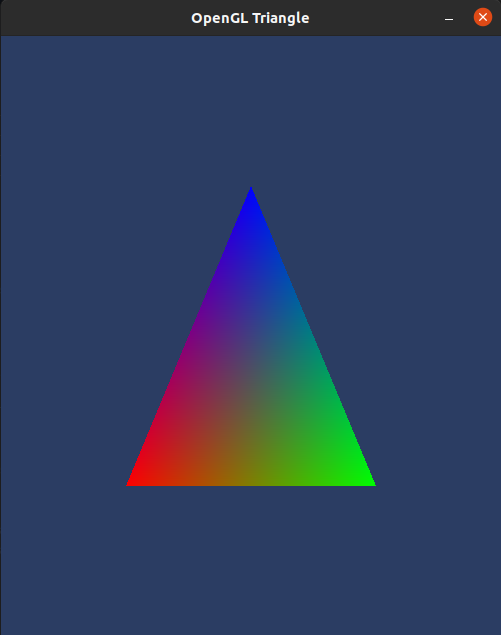
***